# Estadística descriptiva 

In [1]:
# para la lección de hoy tendremos que instalar la siguiente librería. Recordad eliminar "#"
# !pip install scipy

In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [11]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("../files/bank-additional_clean.csv", index_col = 0)
df.head()

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,hijos_totales
0,161770.0,1.0,0.0,2012-04-04,29.0,089b39d8-e4d0-461b-87d4-814d71e0e079,NaN,housemaid,married,basic 4y,No,No,No,telephone,261,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,1.0 hijos
1,85477.0,1.0,1.0,2012-12-30,7.0,e9d37224-cb6f-4942-98d7-46672963d097,57.0,services,married,high school,NaN,No,No,telephone,149,1,NaN,0,nonexistent,1.1,93.994,-36.4,NaN,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,2.0 hijos
2,147233.0,1.0,1.0,2012-02-02,5.0,3f9f49b5-e410-4948-bf6e-f9244f04918b,37.0,services,married,high school,No,Si,No,telephone,226,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,15-febrero-2019,34.939,-94.847,febrero,2019.0,Adultos jóvenes,2.0 hijos
3,121393.0,1.0,2.0,2012-12-21,29.0,9991fafb-4447-451a-8be2-b0df6098d13e,40.0,admin.,married,basic 6y,No,No,No,telephone,151,1,NaN,0,nonexistent,1.1,93.994,-36.4,NaN,5191,no,29-noviembre-2015,49.041,-70.308,noviembre,2015.0,Mediana edad,3.0 hijos
4,63164.0,1.0,2.0,2012-06-20,20.0,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,56.0,services,married,high school,No,No,Si,telephone,307,1,NaN,0,nonexistent,1.1,93.994,-36.4,NaN,5191,no,29-enero-2017,38.033,-104.463,enero,2017.0,Mediana edad,3.0 hijos


# Medidas de centralización



## Media
Para calcular la media usaremos el método `.mean()` de Pandas. Aquí está la sintaxis básica del método `.mean()`:

```python
df['Nombre_de_Columna'].mean()
```

Pongamos dos ejemplos para entender que es la media: 


In [12]:
# Calculamos la media de los ingresos de los clientes.
# Interpretación: La media de ingresos representa el valor promedio de ingresos en el conjunto de datos de clientes. En este contexto, nos permite entender cuál es el ingreso promedio de los clientes en la muestra.

media_ingresos = df['income'].mean()
print(f"La media de los ingresos de los clientes es: {np.round(media_ingresos, 2)}")


La media de los ingresos de los clientes es: 93241.2


In [22]:
# Calculamos la media de edad de los clientes.
# Interpretación: La media de edad nos proporciona la edad promedio de los clientes en el conjunto de datos. Esto puede ser útil para tener una idea general de la edad de la población de clientes.

media_edad = df['age'].mean()
print(f"La media de edad de los clientes es: {np.round(media_edad, 2)}")

La media de edad de los clientes es: 38.0


## Mediana

Para calcular la mediana usaremos el método `.median()`.  Aquí está la sintaxis básica del método `.median()`:

```python
df['Nombre_de_Columna'].median()
```

In [14]:
#  Calculamos la mediana de los ingresos de los clientes.
# Interpretación: La mediana de ingresos es el valor medio de ingresos en el conjunto de datos de clientes cuando los ingresos se ordenan en orden ascendente. En este contexto, nos proporciona el valor de ingresos que se encuentra en la mitad del conjunto de datos, lo que significa que el 50% de los clientes tienen ingresos por encima de este valor y el 50% por debajo.

mediana_ingresos = df['income'].median()
print(f"La media de los ingresos de los clientes es: {np.round(media_ingresos, 2)}")
print(f"La mediana de los ingresos de los clientes es: {np.round(mediana_ingresos, 2)}")


La media de los ingresos de los clientes es: 93241.2
La mediana de los ingresos de los clientes es: 93050.5


**Entonces, ¿Cuál es la diferencia entre media y mediana?**

1. **Media de los Ingresos:** La media de los ingresos de los clientes es aproximadamente 93241.2$ 
Esto significa que si sumamos todos los ingresos de los clientes y luego dividimos ese total por la cantidad de clientes, obtendríamos alrededor de 93241.2$. 
Es como si estuviéramos repartiendo equitativamente el dinero entre todos los clientes, y cada uno recibiría alrededor de 93241.2 $.

2. **Mediana de los Ingresos:** La mediana de los ingresos de los clientes es aproximadamente 93050.5$. 
Imagina que hacemos una lista de todos los ingresos de los clientes en orden de menor a mayor. Luego, encontramos el ingreso que está justo en el medio de la lista. Ese valor es la mediana. En este caso, la mediana es 93050.5$. Esto significa que la mitad de los clientes tiene ingresos menores o iguales a 93050.5$, 
y la otra mitad tiene ingresos mayores o iguales a esa cantidad.

En resumen, la **media** es el promedio de todos los ingresos y puede verse afectada por valores extremos, mientras que la **mediana** es el ingreso que se encuentra justo en el medio cuando los ingresos se ordenan, y no se ve influenciada por valores extremos. Ambas medidas son importantes para entender la distribución de los ingresos de los clientes.


In [15]:
# Calculamos la mediana de edad de los clientes.
# Interpretación: La mediana de edad es el valor medio de edad en el conjunto de datos de clientes cuando las edades se ordenan en orden ascendente. En este contexto, nos proporciona el valor de edad que se encuentra en la mitad del conjunto de datos, lo que significa que el 50% de los clientes tienen edades por encima de este valor y el 50% por debajo.

mediana_edad = df['age'].median()
print(f"La media de la edad de los clientes es: {np.round(media_edad, 2)}")
print(f"La mediana de edad de los clientes es: {np.round(mediana_edad, 2)}")

La media de la edad de los clientes es: 39.98
La mediana de edad de los clientes es: 38.0


Para visualizar la mediana, podemos utilizar un diagrama de caja (*boxplot*) que muestra la distribución de los datos y resalta la mediana junto con los cuartiles (que aprenderemos que son a lo largo de esta lección).


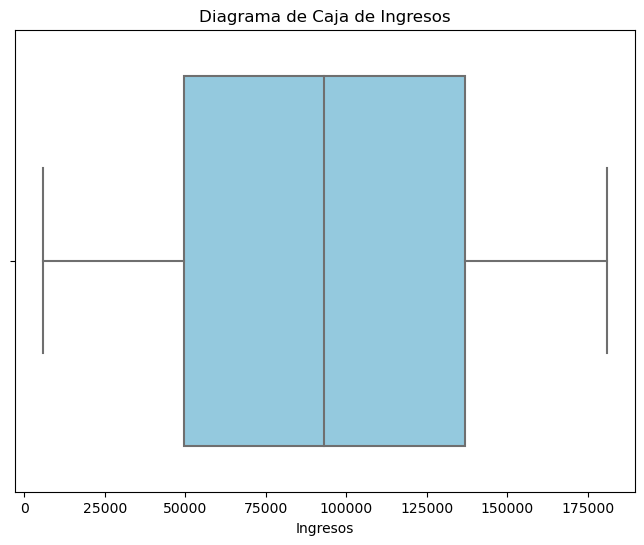

In [16]:
# establecemos el tamaño de la figura
plt.figure(figsize=(8, 6))

# utilizando el método boxplot visualizamos la mediana, cambiamos el color del boxplot
sns.boxplot(x='income', 
            data=df, 
            color='skyblue')

# cambiamos el nombre del eje x
plt.xlabel('Ingresos')

# ponems título a la gráfica
plt.title('Diagrama de Caja de Ingresos');




Este gráfico de caja proporcionará una representación visual de la mediana de ingresos, así como información sobre la dispersión de los datos en esa columna.

Para la mediana de edad, podéis seguir el mismo enfoque y crear un diagrama de caja similar, cambiando `'income'` por `'age'` en el código anterior y viendo los resultados. 

## Moda

Para calcular la moda usaremos el método `.mode()`. La sintaxis básica del método `.mode()`:

```python
df['Nombre_de_Columna'].mode()
```

In [17]:
#  Calculamos la moda de la educación de los clientes.
# Interpretación:  La moda de educación nos muestra el nivel educativo que es más común entre los clientes en nuestro conjunto de datos. En otras palabras, es el nivel educativo con la mayor frecuencia de aparición.

moda_educacion = df['education'].mode()
print(f"La moda de la educación (el tipo de educación que más tienen los clientes) es: {moda_educacion[0]}")


La moda de la educación (el tipo de educación que más tienen los clientes) es: university degree


In [33]:
# Calculamos la moda del mes en que se realizó el contacto.
# Interpretación: La moda del mes de contacto nos dice en qué mes se realizó la mayoría de los contactos con los clientes. Es el mes con la mayor frecuencia de aparición en las interacciones.

moda_mes_contacto = df['contact_month'].mode()
print(f"La moda del mes de contacto (el mes que más contactan con los clientes) es: {moda_mes_contacto[0]}")


La moda del mes de contacto (el mes que más contactan con los clientes) es: noviembre


Las dos formas comunes de visualizar la moda en Seaborn, dependiendo de si estás trabajando con variables categóricas o numéricas.

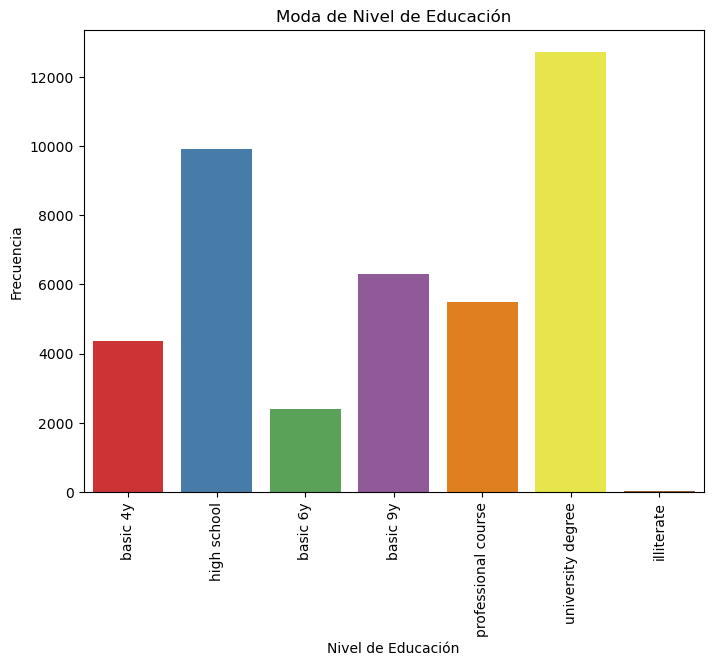

In [19]:
# Para variables categóricas (como niveles educativos, estados, etc.) usaremos un 'countplot()'
# Este gráfico de barras mostrará la frecuencia de cada nivel educativo y resaltará cuál es el más común (la moda).


# establecemos el tamaño de la gráfica
plt.figure(figsize=(8, 6))

# usamos el método `countplot()` para contar cuántos datos por categoría
sns.countplot(x='education', 
              data=df, 
              palette='Set1')

# cambiamos el nombre del eje x
plt.xlabel('Nivel de Educación')

# cambiamos el nombre del eje y
plt.ylabel('Frecuencia')

# ponemos título a la gráfica
plt.title('Moda de Nivel de Educación')

# rotamos las etiquetas del eje x si es necesario
plt.xticks(rotation=90); 

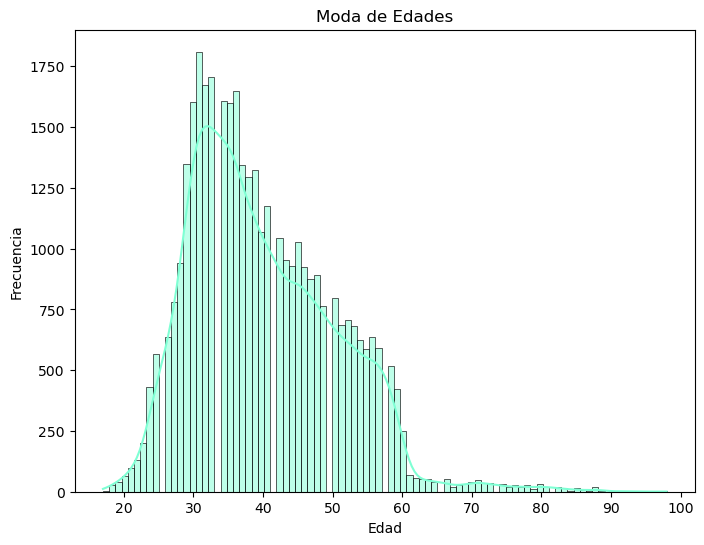

In [20]:
# Para variables numéricas (como edades, ingresos, etc.) usaremos un 'histplot()'
# Visualizar la moda de variables numéricas puede ser más desafiante, ya que la moda es un valor específico en lugar de una distribución de categorías. 

# establecemos el tamaño de la gráfica
plt.figure(figsize=(8, 6))

# creamos la gráfica usando el método 'histplot()'
sns.histplot(data=df,
             x='age',
             kde=True, 
             color='aquamarine')

# cambiamos el nombre del eje x
plt.xlabel('Edad')

# cambiamos el nombre del eje y
plt.ylabel('Frecuencia')

# ponemos título a la gráfica
plt.title('Moda de Edades');